# Data Description

1. car_ID: A unique identifier for each car in the dataset.
2. symboling: Assigned insurance risk rating for the car (-3, -2, -1, 0, 1, 2, 3) where higher values indicate higher risk.
3. CarName: The name of the car model.
4. fueltype: The type of fuel used by the car (gas or diesel).
5. aspiration: The aspiration method of the car's engine (std or turbo).
6. doornumber: The number of doors on the car (two or four).
7. carbody: The body style of the car (sedan, hatchback, wagon, hardtop, convertible).
8. drivewheel: The type of drivewheel (4wd, fwd, rwd).
9. enginelocation: The location of the car's engine (front or rear).
10. wheelbase: The distance between the centers of the front and rear wheels.
11. carlength: The length of the car in inches.
12. carwidth: The width of the car in inches.
13. carheight: The height of the car in inches.
14. curbweight: The weight of the car without occupants or baggage.
15. enginetype: The type of engine (ohc, ohcf, ohcv, dohc, dohcv, l, rotor).
16. cylindernumber: The number of cylinders in the engine (four, six, eight, three, five, twelve, two).
17. enginesize: The size of the engine in cubic centimeters.
18. fuelsystem: The fuel system of the car (mpfi, 2bbl, idi, 1bbl, spdi, 4bbl, mfi, spfi).
19. boreratio: The ratio of the cylinder bore diameter to the piston stroke length.
20. stroke: The length of the piston stroke in inches.
21. compressionratio: The compression ratio of the engine.
22. horsepower: The power of the engine in horsepower.
23. peakrpm: The peak revolutions per minute of the engine.
24. citympg: The city fuel economy in miles per gallon.
25. highwaympg: The highway fuel economy in miles per gallon.
26. price: The price of the car in USD.

In [71]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

import pickle
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [72]:
df = pd.read_csv('data.csv')

In [73]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [74]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [76]:
df.select_dtypes(include=['int64','float64']).describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [77]:
df.drop('car_ID',axis=1,inplace=True)

In [31]:
df.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [32]:
df.duplicated().sum()

0

# Univariate Analysis

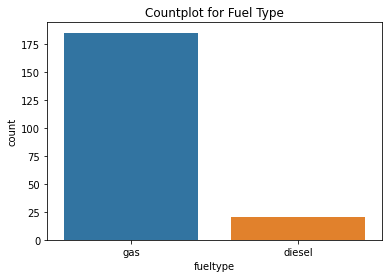

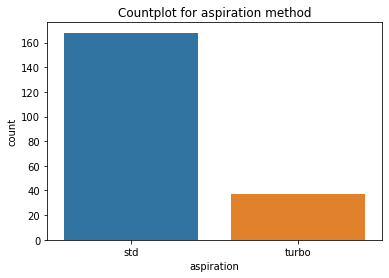

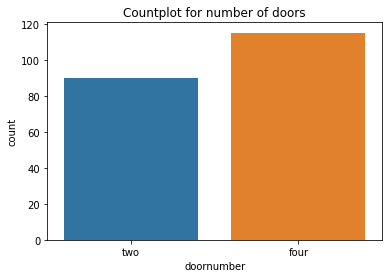

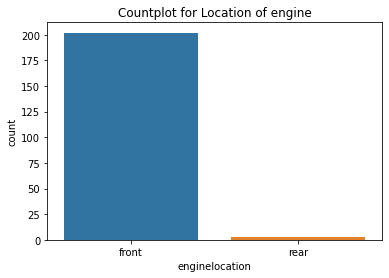

In [10]:
sns.countplot(df['fueltype'])
plt.title('Countplot for Fuel Type')
plt.show()

sns.countplot(df['aspiration'])
plt.title('Countplot for aspiration method')
plt.show()

sns.countplot(df['doornumber'])
plt.title('Countplot for number of doors')
plt.show()

sns.countplot(df['enginelocation'])
plt.title('Countplot for Location of engine')
plt.show()

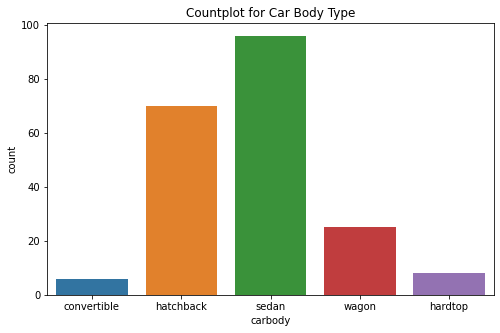

In [11]:
plt.figure(figsize=(8,5))
sns.countplot(df['carbody'])
plt.title('Countplot for Car Body Type')
plt.show()

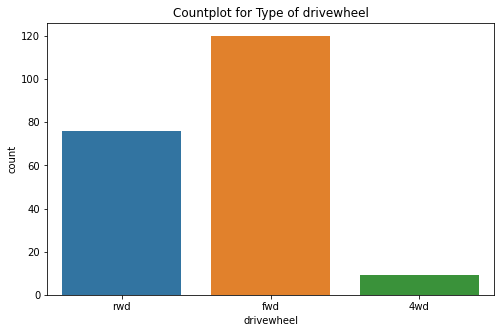

In [12]:
plt.figure(figsize=(8, 5))
sns.countplot(df['drivewheel'])
plt.title('Countplot for Type of drivewheel')
plt.show()

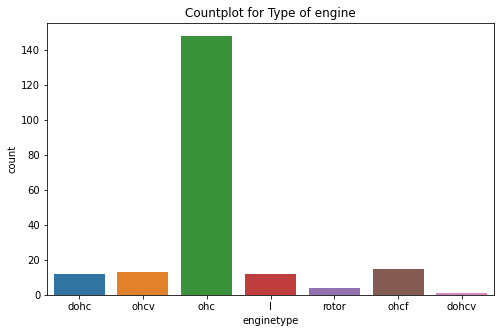

In [13]:
plt.figure(figsize=(8, 5))
sns.countplot(df['enginetype'])
plt.title('Countplot for Type of engine')
plt.show()

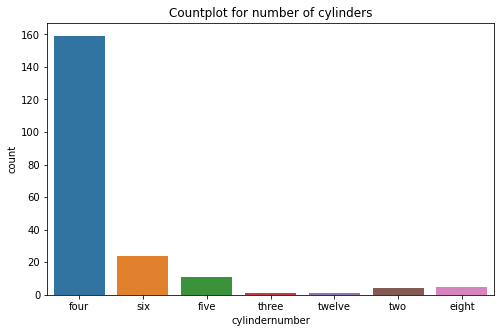

In [14]:
plt.figure(figsize=(8, 5))
sns.countplot(df['cylindernumber'])
plt.title('Countplot for number of cylinders')
plt.show()

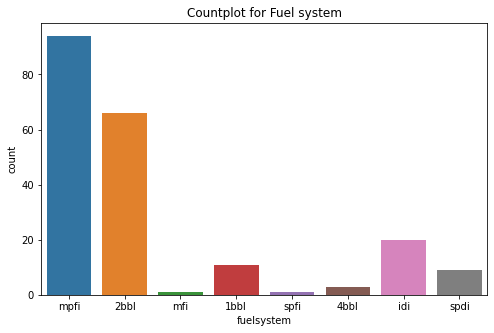

In [15]:
plt.figure(figsize=(8, 5))
sns.countplot(df['fuelsystem'])
plt.title('Countplot for Fuel system')
plt.show()

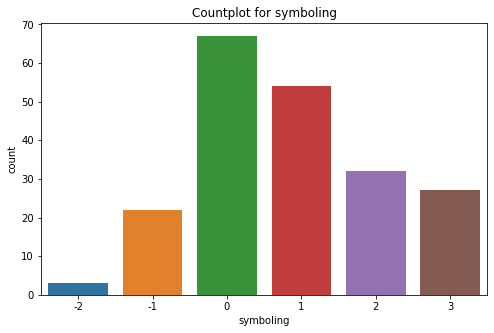

In [16]:
plt.figure(figsize=(8, 5))
sns.countplot(df['symboling'])
plt.title('Countplot for symboling')
plt.show()

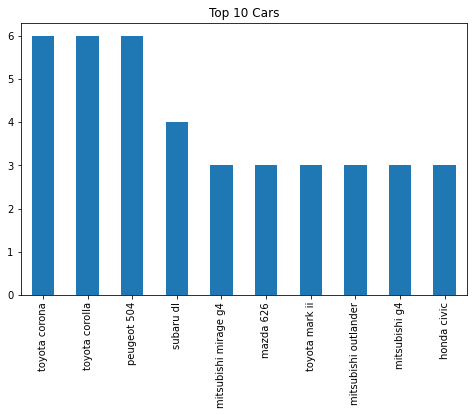

In [17]:
plt.figure(figsize=(8, 5))
df['CarName'].value_counts()[0:10].plot(kind='bar')
plt.title('Top 10 Cars')
plt.show()

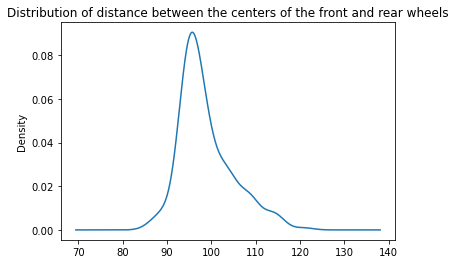

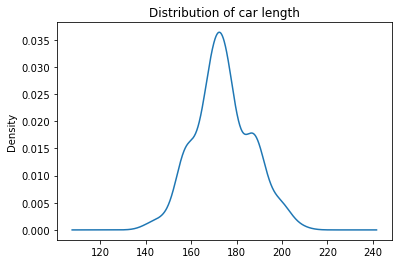

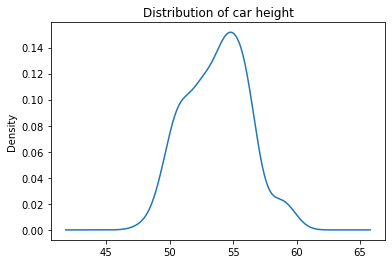

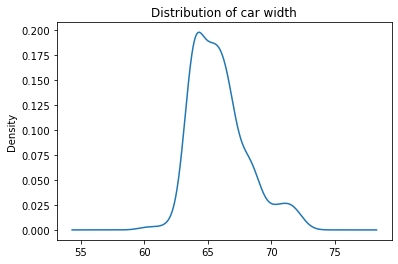

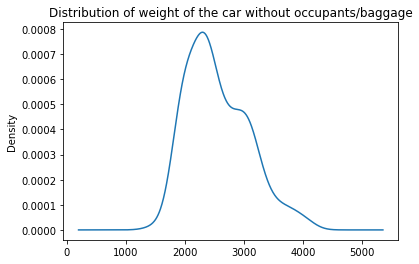

In [18]:
df['wheelbase'].plot(kind='kde')
plt.title('Distribution of distance between the centers of the front and rear wheels')
plt.show()

df['carlength'].plot(kind='kde')
plt.title('Distribution of car length')
plt.show()

df['carheight'].plot(kind='kde')
plt.title('Distribution of car height')
plt.show()

df['carwidth'].plot(kind='kde')
plt.title('Distribution of car width')
plt.show()

df['curbweight'].plot(kind='kde')
plt.title('Distribution of weight of the car without occupants/baggage')
plt.show()

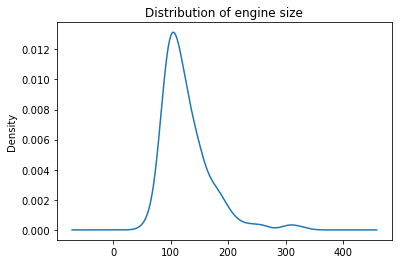

In [19]:
df['enginesize'].plot(kind='kde')
plt.title('Distribution of engine size')
plt.show()

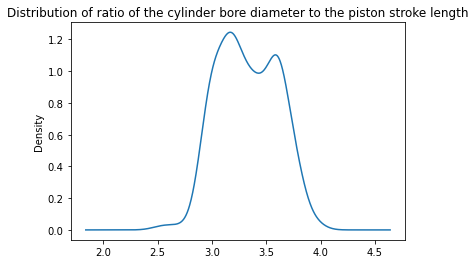

In [20]:
df['boreratio'].plot(kind='kde')
plt.title('Distribution of ratio of the cylinder bore diameter to the piston stroke length')
plt.show()

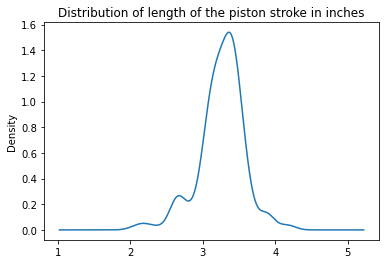

In [21]:
df['stroke'].plot(kind='kde')
plt.title('Distribution of length of the piston stroke in inches')
plt.show()

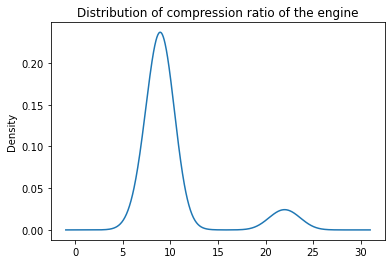

In [22]:
df['compressionratio'].plot(kind='kde')
plt.title('Distribution of compression ratio of the engine')
plt.show()

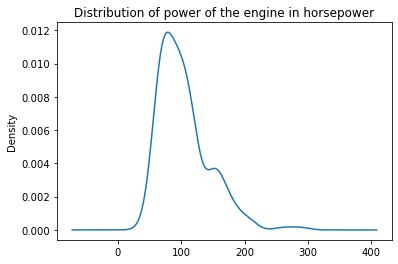

In [23]:
df['horsepower'].plot(kind='kde')
plt.title('Distribution of power of the engine in horsepower')
plt.show()

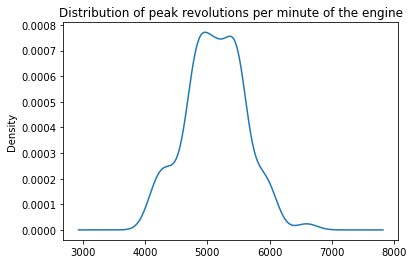

In [24]:
df['peakrpm'].plot(kind='kde')
plt.title('Distribution of peak revolutions per minute of the engine')
plt.show()

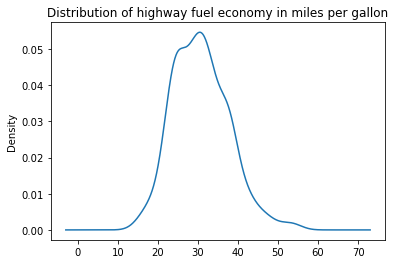

In [25]:
df['highwaympg'].plot(kind='kde')
plt.title('Distribution of highway fuel economy in miles per gallon')
plt.show()

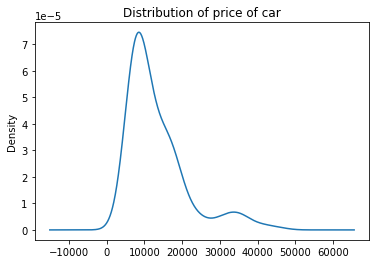

In [26]:
df['price'].plot(kind='kde')
plt.title('Distribution of price of car')
plt.show()

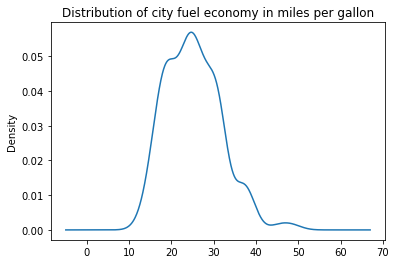

In [27]:
df['citympg'].plot(kind='kde')
plt.title('Distribution of city fuel economy in miles per gallon')
plt.show()

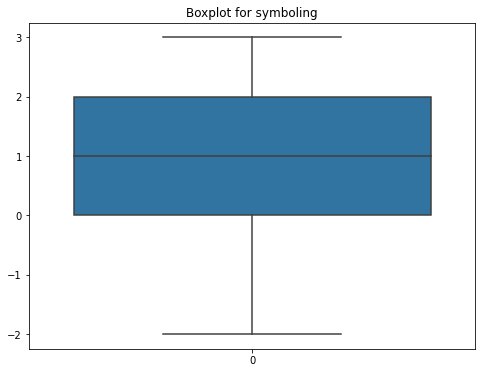

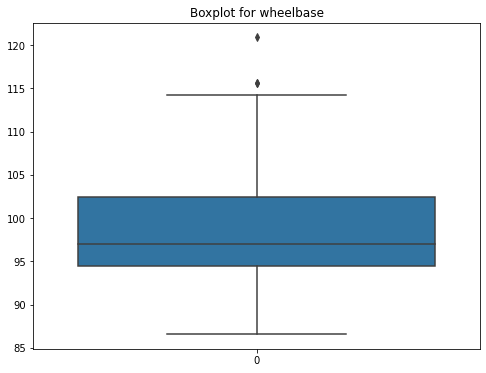

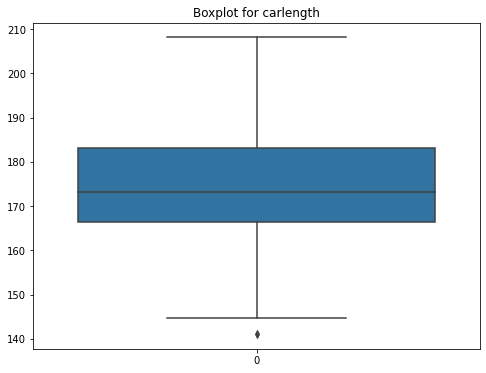

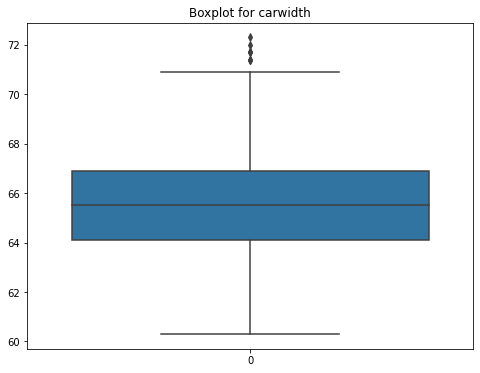

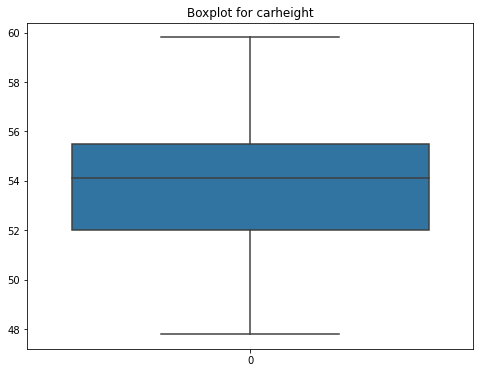

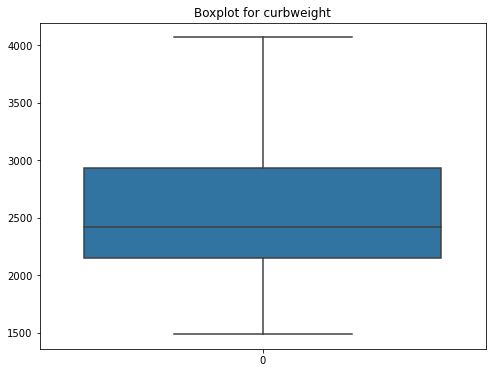

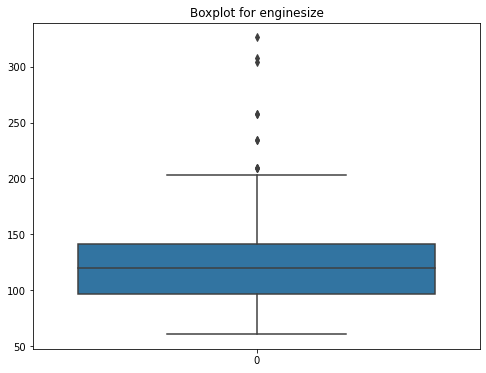

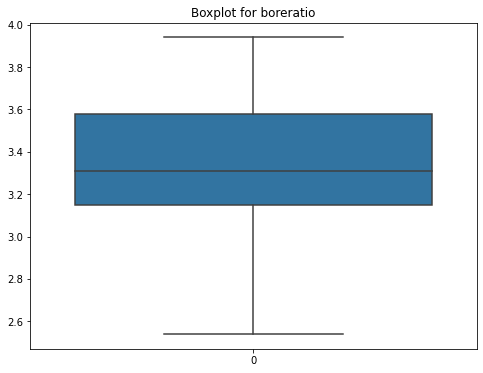

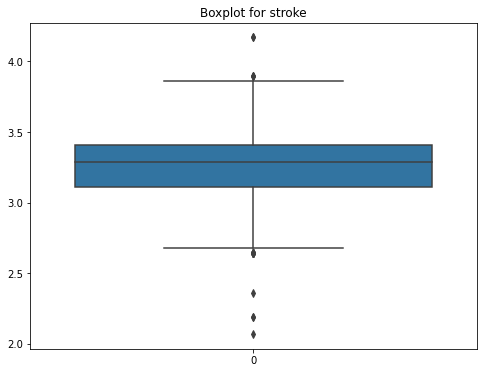

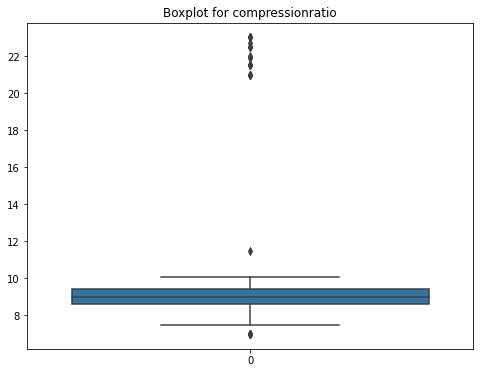

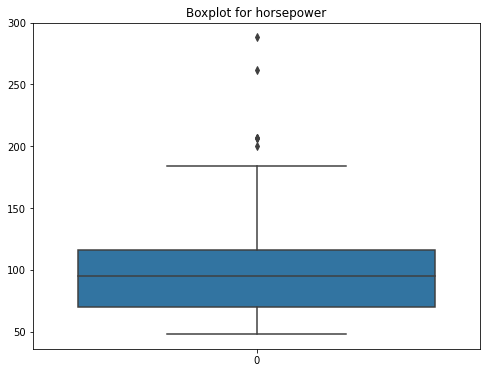

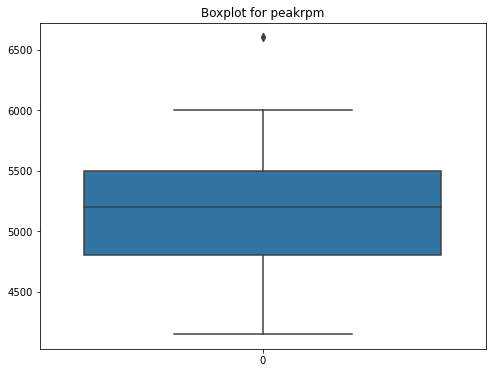

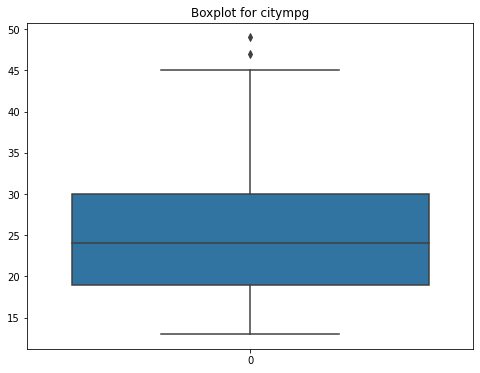

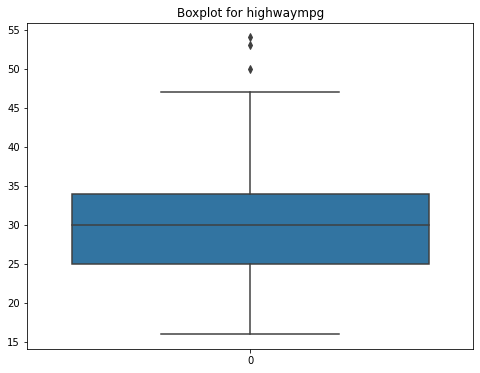

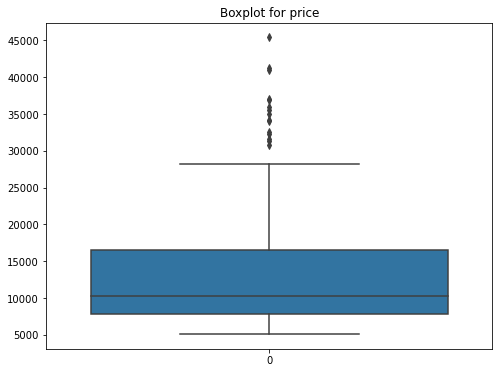

In [28]:
numerical_columns = df.select_dtypes(include='number').columns

# Plot boxplots for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

# Multivariate Analysis

In [29]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


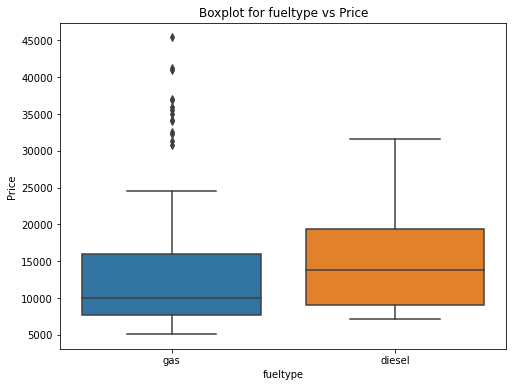

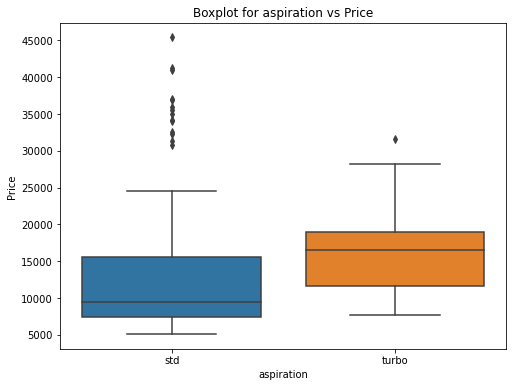

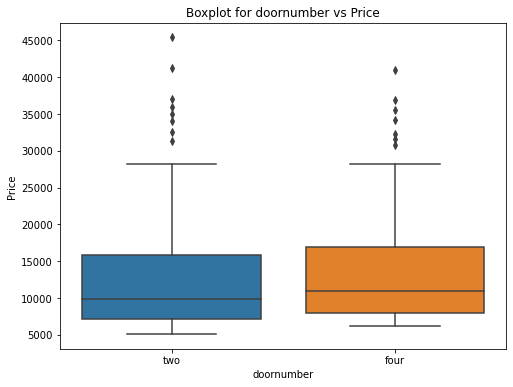

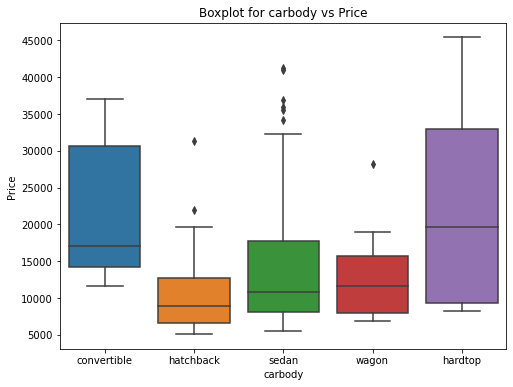

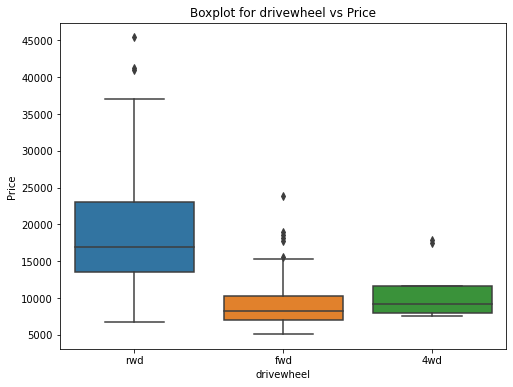

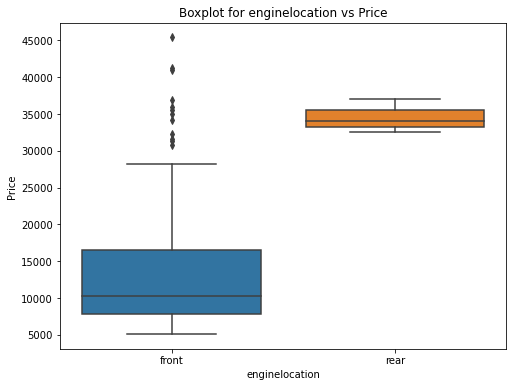

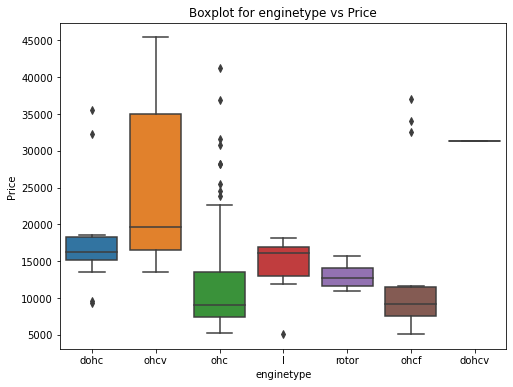

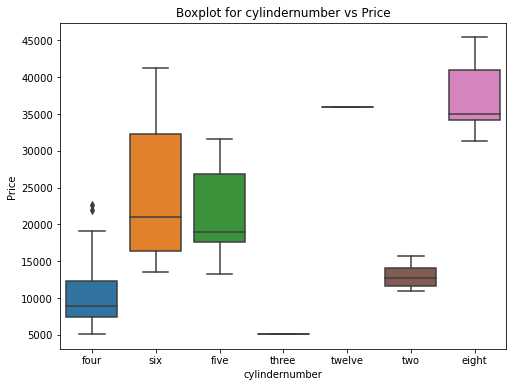

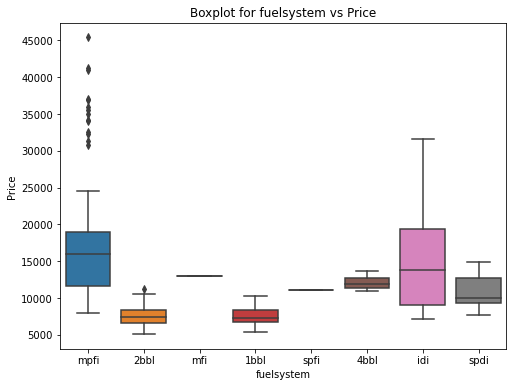

In [30]:
# Select numerical columns
numerical_columns = df.select_dtypes(include='object').columns

# Plot boxplots for each numerical column with the target variable, excluding 'CarName'
for column in numerical_columns:
    if column != 'CarName':
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df[column], y=df['price'])
        plt.title(f'Boxplot for {column} vs Price')
        plt.xlabel(column)
        plt.ylabel('Price')
        plt.show()


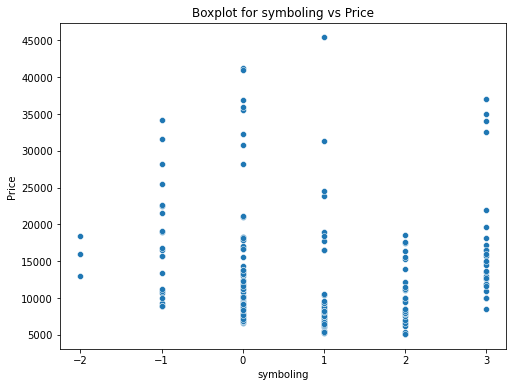

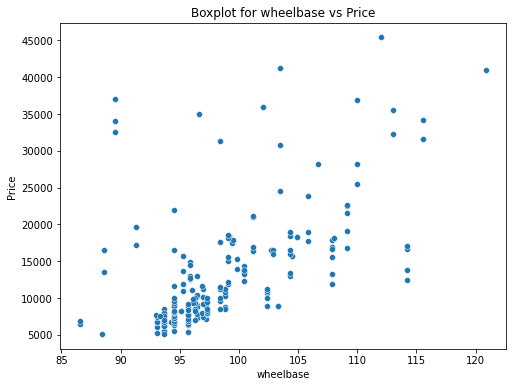

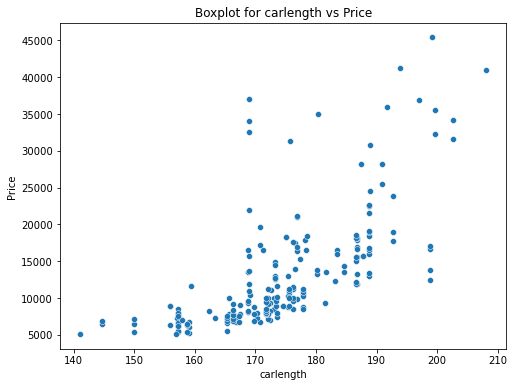

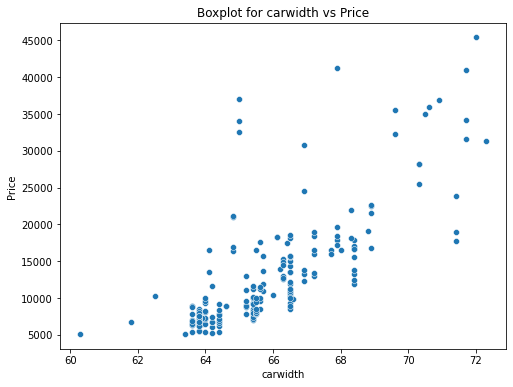

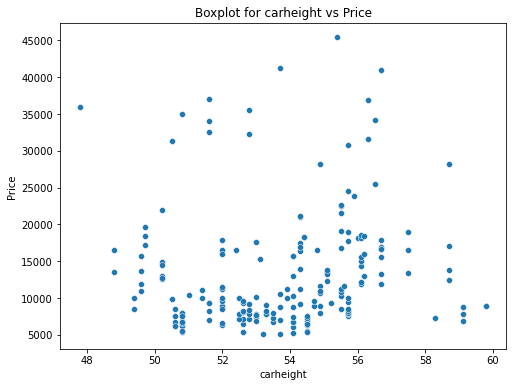

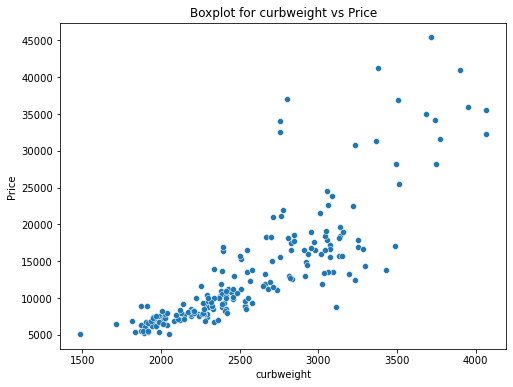

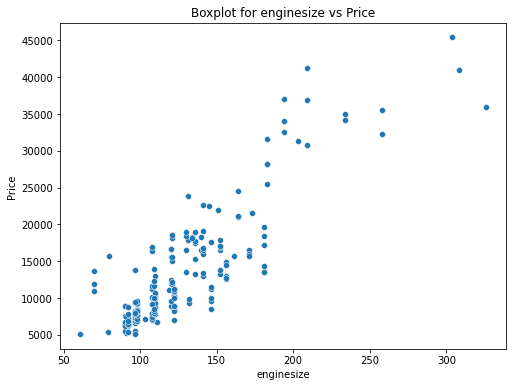

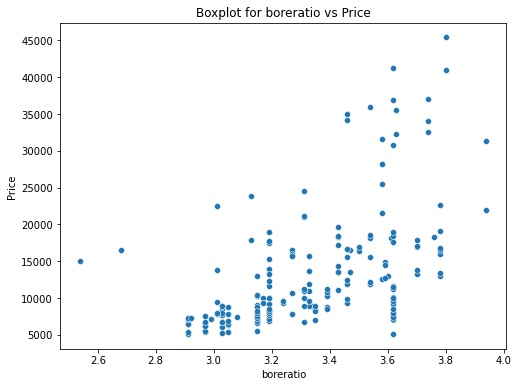

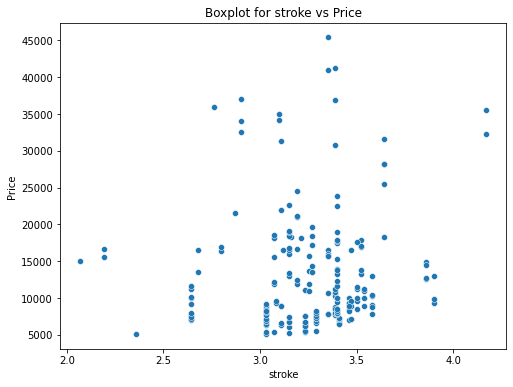

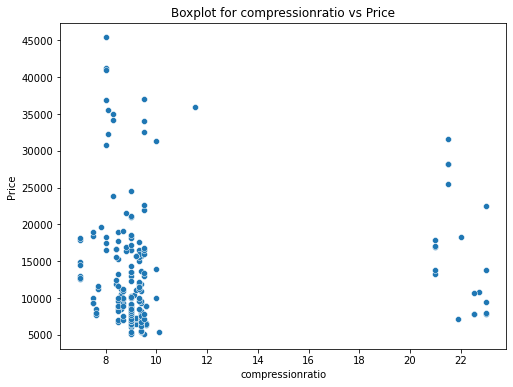

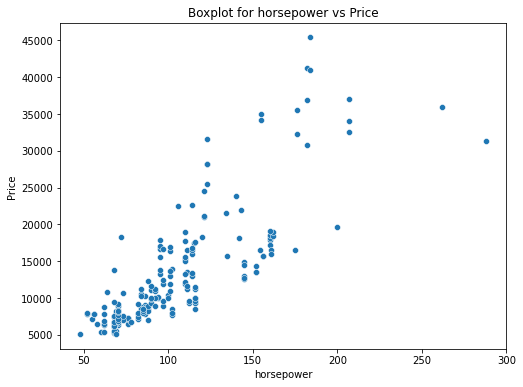

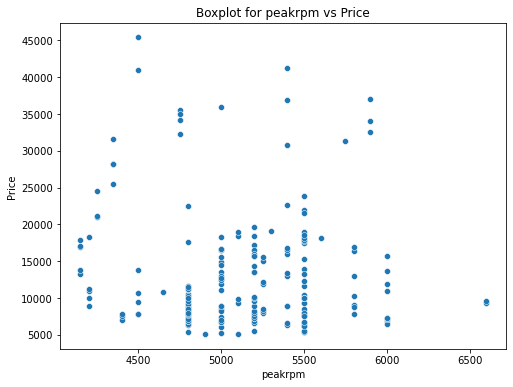

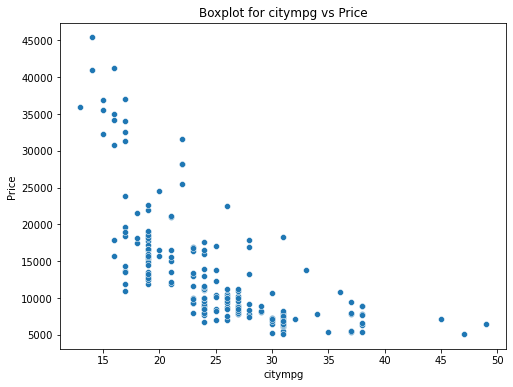

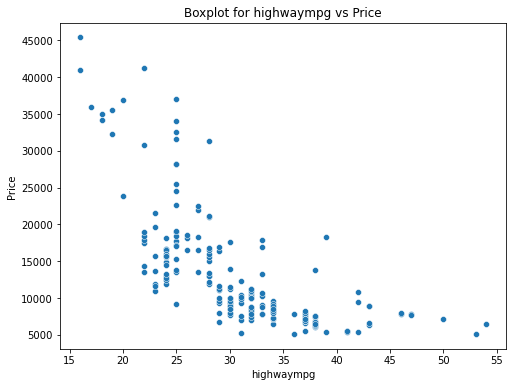

In [31]:
# Select numerical columns
numerical_columns = df.select_dtypes(include='number').columns

# Plot boxplots for each numerical column with the target variable, excluding 'CarName'
for column in numerical_columns:
    if column != 'price':
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=df[column], y=df['price'])
        plt.title(f'Boxplot for {column} vs Price')
        plt.xlabel(column)
        plt.ylabel('Price')
        plt.show()


<AxesSubplot:>

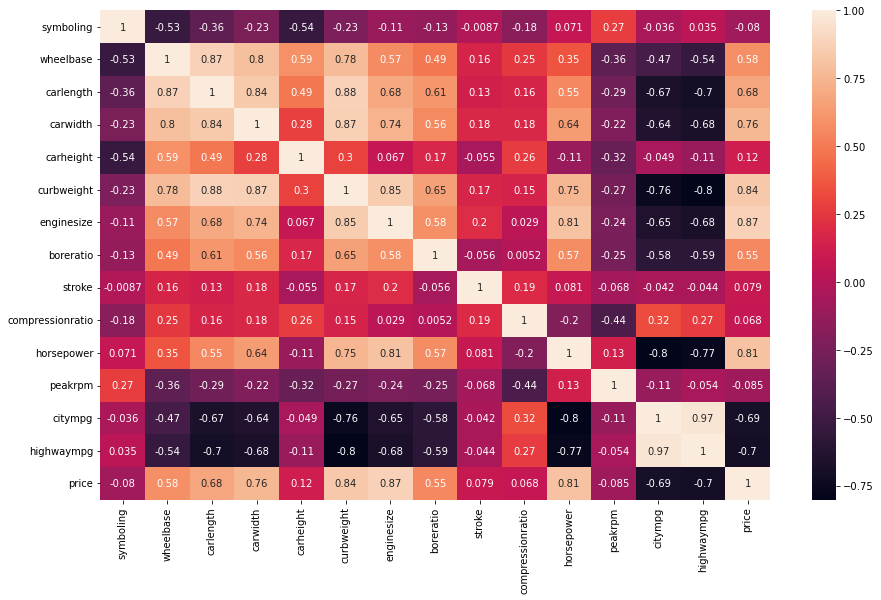

In [32]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True)

# Feature Engineering

In [33]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [33]:
df['CarName'].value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

In [78]:
df.drop('CarName',axis=1,inplace=True)

In [79]:
# Select categorical columns
categorical_columns = df.select_dtypes(include='object').columns

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Print the encoded DataFrame
df_encoded.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0


In [80]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 53 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   symboling              205 non-null    int64  
 1   wheelbase              205 non-null    float64
 2   carlength              205 non-null    float64
 3   carwidth               205 non-null    float64
 4   carheight              205 non-null    float64
 5   curbweight             205 non-null    int64  
 6   enginesize             205 non-null    int64  
 7   boreratio              205 non-null    float64
 8   stroke                 205 non-null    float64
 9   compressionratio       205 non-null    float64
 10  horsepower             205 non-null    int64  
 11  peakrpm                205 non-null    int64  
 12  citympg                205 non-null    int64  
 13  highwaympg             205 non-null    int64  
 14  price                  205 non-null    float64
 15  fuelty

# Model Building

In [81]:
X = df_encoded.drop('price',axis=1)
y = df_encoded['price']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

### Linear Regression

In [83]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
y_pred = linear_regression.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Linear Regression Root Mean Squared Error:", rmse)
print('R Squared:',r2_score(y_test,y_pred))

Linear Regression Root Mean Squared Error: 3095.7337274320503
R Squared: 0.8303665541822597


In [40]:
# Hyperparameter Tuning


linear_regression = LinearRegression()

# Define the hyperparameters to tune
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=linear_regression, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict using the best model
y_pred = best_model.predict(X_test)

# Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Linear Regression Root Mean Squared Error:", rmse)

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

Linear Regression Root Mean Squared Error: 2697.426934841211
Best Hyperparameters: {'fit_intercept': False, 'positive': False}


### Ridge Regression

In [41]:
ridge_regression = Ridge()
ridge_regression.fit(X_train, y_train)
y_pred = ridge_regression.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Ridge Regression Root Mean Squared Error:", rmse)
print('R Squared:',r2_score(y_test,y_pred))

Ridge Regression Root Mean Squared Error: 2550.852424183541
R Squared: 0.9021779420594693


### Lasso Regression

In [42]:
lasso_regression = Lasso()
lasso_regression.fit(X_train, y_train)
y_pred = lasso_regression.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Lasso Regression Root Mean Squared Error:", rmse)
print('R Squared:',r2_score(y_test,y_pred))

Lasso Regression Root Mean Squared Error: 2603.4112753061463
R Squared: 0.8981052776560559


### Elastic_net_regression

In [43]:
elastic_net_regression = ElasticNet()
elastic_net_regression.fit(X_train, y_train)
y_pred = elastic_net_regression.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("ElasticNet Regression Root Mean Squared Error:", rmse)
print('R Squared:',r2_score(y_test,y_pred))

ElasticNet Regression Root Mean Squared Error: 3161.6767215378254
R Squared: 0.849720046958409


### Decision Tree Regression

In [44]:
decision_tree_regression = DecisionTreeRegressor()
decision_tree_regression.fit(X_train, y_train)
y_pred = decision_tree_regression.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Decision Tree Regression Root Mean Squared Error:", rmse)
print('R Squared:',r2_score(y_test,y_pred))

Decision Tree Regression Root Mean Squared Error: 2574.510986293977
R Squared: 0.9003549736714772


### Random Forest Regression

In [84]:
random_forest_regression = RandomForestRegressor(random_state=2)
random_forest_regression.fit(X_train, y_train)
y_pred = random_forest_regression.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Random Forest Regression Root Mean Squared Error:", rmse)
print('R Squared:',r2_score(y_test,y_pred))

Random Forest Regression Root Mean Squared Error: 2317.087267938423
R Squared: 0.9049681752808184


### Gradient Boosting regression

In [46]:
gradient_boosting_regression = GradientBoostingRegressor()
gradient_boosting_regression.fit(X_train, y_train)
y_pred = gradient_boosting_regression.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Gradient Boosting Regression Root Mean Squared Error:", rmse)
print('R Squared:',r2_score(y_test,y_pred))

Gradient Boosting Regression Root Mean Squared Error: 2399.874148248083
R Squared: 0.9134149200463876


### Support Vector Machine

In [47]:
svr_regression = SVR()
svr_regression.fit(X_train, y_train)
y_pred = svr_regression.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Support Vector Regression Root Mean Squared Error:", rmse)
print('R Squared:',r2_score(y_test,y_pred))

Support Vector Regression Root Mean Squared Error: 8361.301475752576
R Squared: -0.051027048080980464


### MLPRegressor

In [48]:
mlp_regression = MLPRegressor()
mlp_regression.fit(X_train, y_train)
y_pred = mlp_regression.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("MLP Regression Root Mean Squared Error:", rmse)
print('R Squared:',r2_score(y_test,y_pred))

MLP Regression Root Mean Squared Error: 7339.981283410303
R Squared: 0.19005406082843934


# Model Building after Scaling

In [49]:
X = df_encoded.drop('price',axis=1)
y = df_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [50]:
scaler= StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear regression

In [51]:
linear_regression = LinearRegression()
linear_regression.fit(X_train_scaled, y_train)
y_pred = linear_regression.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Linear Regression Root Mean Squared Error:", rmse)
print('R Squared:',r2_score(y_test,y_pred))

Linear Regression Root Mean Squared Error: 2931.94543849174
R Squared: 0.8074253104770446


### Ridge Regression

In [52]:
ridge_regression = Ridge()
ridge_regression.fit(X_train_scaled, y_train)
y_pred = ridge_regression.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Ridge Regression Root Mean Squared Error:", rmse)
print('R Squared:',r2_score(y_test,y_pred))

Ridge Regression Root Mean Squared Error: 2668.2777868917437
R Squared: 0.8405041014364879


### Lasso Regression

In [53]:
lasso_regression = Lasso()
lasso_regression.fit(X_train_scaled, y_train)
y_pred = lasso_regression.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Lasso Regression Root Mean Squared Error:", rmse)
print('R Squared:',r2_score(y_test,y_pred))

Lasso Regression Root Mean Squared Error: 2934.3188848450186
R Squared: 0.8071134010610196


### Elastic Net Regression

In [54]:
elastic_net_regression = ElasticNet()
elastic_net_regression.fit(X_train_scaled, y_train)
y_pred = elastic_net_regression.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("ElasticNet Regression Root Mean Squared Error:", rmse)
print('R Squared:',r2_score(y_test,y_pred))

ElasticNet Regression Root Mean Squared Error: 2486.598431989228
R Squared: 0.8614843804025121


### Decision Tree Regression

In [55]:
decision_tree_regression = DecisionTreeRegressor()
decision_tree_regression.fit(X_train_scaled, y_train)
y_pred = decision_tree_regression.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Decision Tree Regression Root Mean Squared Error:", rmse)
print('R Squared:',r2_score(y_test,y_pred))

Decision Tree Regression Root Mean Squared Error: 3232.560259398912
R Squared: 0.765911166727682


### Random Forest Regression

In [56]:
random_forest_regression = RandomForestRegressor()
random_forest_regression.fit(X_train_scaled, y_train)
y_pred = random_forest_regression.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Random Forest Regression Root Mean Squared Error:", rmse)
print('R Squared:',r2_score(y_test,y_pred))

Random Forest Regression Root Mean Squared Error: 2071.572435992902
R Squared: 0.9038636375407759


### Gradient Boosting Regression

In [57]:
gradient_boosting_regression = GradientBoostingRegressor()
gradient_boosting_regression.fit(X_train_scaled, y_train)
y_pred = gradient_boosting_regression.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Gradient Boosting Regression Root Mean Squared Error:", rmse)
print('R Squared:',r2_score(y_test,y_pred))

Gradient Boosting Regression Root Mean Squared Error: 1974.8553501508236
R Squared: 0.9126308682426598


### Support Vector Machine

In [58]:
svr_regression = SVR()
svr_regression.fit(X_train_scaled, y_train)
y_pred = svr_regression.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Support Vector Regression Root Mean Squared Error:", rmse)
print('R Squared:',r2_score(y_test,y_pred))

Support Vector Regression Root Mean Squared Error: 6985.209383420629
R Squared: -0.09306577313113151


### MLPRegressor

In [59]:
mlp_regression = MLPRegressor()
mlp_regression.fit(X_train_scaled, y_train)
y_pred = mlp_regression.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("MLP Regression Root Mean Squared Error:", rmse)
print('R Squared:',r2_score(y_test,y_pred))

MLP Regression Root Mean Squared Error: 13965.323834379127
R Squared: -3.369074594957037


 Even after scaling the model performance doesn't get that better

In [60]:
# Select categorical columns
categorical_columns = df.select_dtypes(include='object').columns

# Apply label encoding to each categorical column
le = LabelEncoder()
for column in categorical_columns:
    df[column] = le.fit_transform(df[column])

# Print the encoded DataFrame
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,1,0,1,0,2,0,88.6,168.8,64.1,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,0,1,0,2,0,88.6,168.8,64.1,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,0,1,2,2,0,94.5,171.2,65.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,1,0,0,3,1,0,99.8,176.6,66.2,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,1,0,0,3,0,0,99.4,176.6,66.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


# Feature Importance

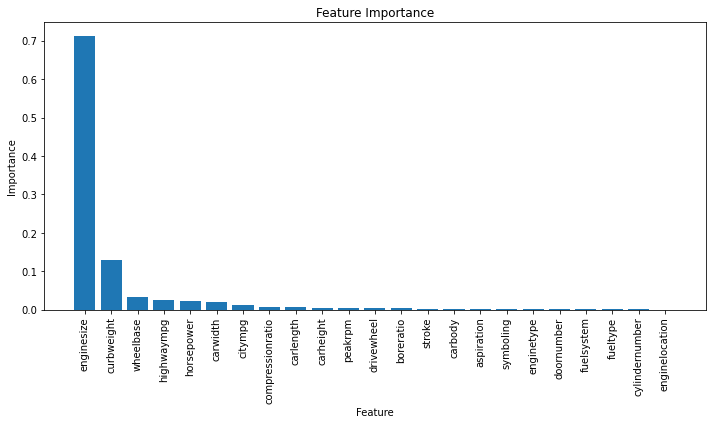

In [61]:
X=df.drop('price',axis=1)
y=df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
# Create a Random Forest regressor
rf = RandomForestRegressor()

# Fit the model
rf.fit(X_train, y_train)

# Get the feature importances
importances = rf.feature_importances_

# Sort the feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]

# Extract the feature names
feature_names = X_train.columns

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[sorted_indices])
plt.xticks(range(len(importances)), feature_names[sorted_indices], rotation='vertical')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()


# Data preprocessing and model training Pipeline

In [202]:
# Model Building Code

import pandas as pd
import pickle
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
df = pd.read_csv('data.csv')

# Define the categorical columns
categorical_columns = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
                       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

# Drop unnecessary columns
df.drop(['car_ID', 'CarName'], axis=1, inplace=True)

# Split the data into features (X) and target variable (y)
X = df.drop('price', axis=1)
y = df['price']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Create a preprocessing pipeline for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)
    ])

# Create a pipeline for the complete process
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
print("R Squared:", r2)

# Save the trained pipeline for future use
with open('pipeline.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

# Save the categorical columns
with open('encoded_columns.pkl', 'wb') as file:
    pickle.dump(categorical_columns, file)


R Squared: 0.8204667308446874
